# Лабораторная работа 1

## Логинов Сергей

## Вариант 15

Загрузим модули для работы с данными

In [25]:
from pandas_datareader import data as pdr
import datetime as dt

1. Напишем функцию для считывания данных компаний.

In [26]:
def read_data(companies_, start_date_, end_date_):
    all_data_ = dict()
    for i in companies_:
        all_data_[i] = pdr.get_data_yahoo(companies_[i], start_date_, end_date_)
    return all_data_

    Определим данные, которые хотим считать (Coca-Cola, Cleveland-Cliffs Inc, United Microelectronics Corp ADR за 2019 год) и запустим функцию read_data. 

In [27]:
start_date = dt.date(2019, 1, 1)
end_date = dt.date(2019, 12, 31)
companies = {
    "Coca-Cola Company": "KO",
    "Cleveland-Cliffs Inc": "CLF",
    "United Microelectronics Corp ADR": "UMC"
}
all_data = read_data(companies, start_date, end_date)

    Распечатаем эти данные.

In [28]:
for i in all_data:
    print("-" * 100)
    print("Данные по ценным бумагам компании {} c начала {} года до конца {}:".format(i,start_date.year, 
                                                                                      end_date.year))
    print(all_data[i])
    print("-" * 100, end="\n\n")

----------------------------------------------------------------------------------------------------
Данные по ценным бумагам компании Coca-Cola Company c начала 2019 года до конца 2019:
                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-01-02  47.220001  46.560001  46.939999  46.930000  11603700.0  41.707706
2019-01-03  47.369999  46.529999  46.820000  46.639999  14714400.0  41.449982
2019-01-04  47.570000  46.639999  46.750000  47.570000  13013700.0  42.276482
2019-01-07  47.750000  46.900002  47.570000  46.950001  13135500.0  41.725479
2019-01-08  47.570000  47.040001  47.250000  47.480000  15420700.0  42.196503
...               ...        ...        ...        ...         ...        ...
2019-12-24  55.000000  54.639999  54.799999  54.709999   3359300.0  50.162605
2019-12-26  55.020000  54.790001  54.919998  55.020000   6228500.0  50.446838
2019-12-27  55.450001  55.000000 

2.  Определим ценную бумагу, имеющую минимальную среднюю дневную доходность, и построим график изменения ее стоимости.

In [29]:
def min_avg_income(data):
    def get_avg_income(data_):
        values = {}
        for i in data_:
            value = data_[i]["Adj Close"].pct_change().mean()
            values[i] = value
        return values
    avg_income = get_avg_income(data)
    min_val = min(avg_income, key=avg_income.get)
    return [min_val, avg_income[min_val]]

    Выведем компанию с минимальной средней дневной доходностью и построим график изменения ее стоимости.

In [30]:
min_avg_income_company = min_avg_income(all_data)
print("Компания с минимальной средней "
      "дневной доходностью: {}(значение {})".format(min_avg_income_company[0],
                                                      min_avg_income_company[1]))

Компания с минимальной средней дневной доходностью: Coca-Cola Company(значение 0.0008397261912822444)


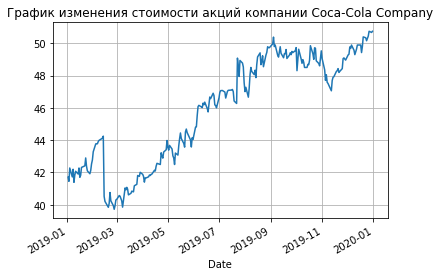

In [31]:
all_data[min_avg_income_company[0]]["Adj Close"].plot.\
    line(grid=True, 
         title="График изменения стоимости акций компании {}".format(min_avg_income_company[0]));

3. Для ценной бумаги, имеющую максимальную дневную доходность, построим диаграмму размаха для дневных доходностей. 

In [32]:
def max_day_income(data):
    def get_day_income(data_):
        values = {}
        for i in data_:
            value = data_[i]["Adj Close"].pct_change().max()
            values[i] = value
        return values
    max_income = get_day_income(data)
    max_val = max(max_income, key=max_income.get)
    return [max_val, max_income[max_val]]

In [33]:
max_day_income_company = max_day_income(all_data)
print("Компания с максимальной "
      "дневной доходностью акций: {}(значение {})".format(max_day_income_company[0],
                                                      max_day_income_company[1]))

Компания с максимальной дневной доходностью акций: Cleveland-Cliffs Inc(значение 0.1773666915629808)


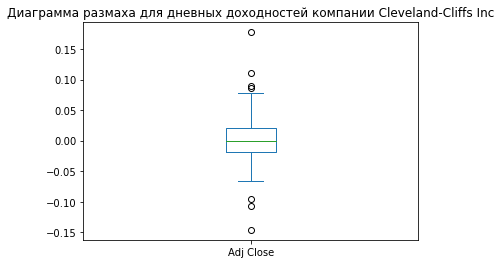

In [34]:
all_data[max_day_income_company[0]]["Adj Close"].pct_change().plot.box(title="Диаграмма размаха для дневных доходностей компании {}".format(max_day_income_company[0]));

4. Для ценной бумаги, имеющей минимальную дисперсию дневной доходности, построим и визуализируем эмпирическую функцию распределения дневной доходности. 

In [35]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

In [36]:
def min_std_income(data):
    def get_min_std_income(data_):
        values = {}
        for i in data_:
            value = data_[i]["Adj Close"].pct_change().std()
            values[i] = value
        return values

    std_income = get_min_std_income(data)
    min_val = min(std_income, key=std_income.get)
    return [min_val, std_income[min_val]]

In [37]:
min_std_income_company = min_std_income(all_data)
current_company = all_data[min_std_income_company[0]]["Adj Close"].pct_change()
max_change = current_company.max()
min_change = current_company.min()
npoints = len(current_company)

dx = (max_change - min_change) / npoints
xlist = [min_change + dx * i for i in range(npoints)]
ylist = [ECDF(current_company, x) for x in xlist]


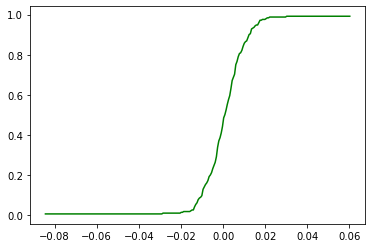

In [38]:
import matplotlib.pyplot as plt

plt.plot(xlist, ylist,'g', label="Функция распределения дневной доходности"); 

5. Вычислим матрицу корреляции дневных доходностей ценных бумаг и для пары ценных бумаг с наиболее низкой корреляцией построим диаграмму рассеяния стоимости ценных бумаг.


In [39]:
import pandas as pd
def get(data_):
    datas = []
    tickers = []
    def data(tiker):
        return data_[tiker]
    for i in data_.keys():
        datas.append(data(i))
        tickers.append(i)

    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

all_data = get(all_data)
daily_close_pr = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_close_pr

Ticker,Cleveland-Cliffs Inc,Coca-Cola Company,United Microelectronics Corp ADR
Date,,,
2019-01-02,7.442865,41.707706,1.464247
2019-01-03,7.271326,41.449982,1.431157
2019-01-04,8.071839,42.276482,1.422884
2019-01-07,8.319616,41.725479,1.464247
2019-01-08,8.157610,42.196503,1.464247
...,...,...,...
2019-12-24,8.208316,50.162605,2.346024
2019-12-26,8.169229,50.446838,2.337399
2019-12-27,8.032424,50.749401,2.346024


In [40]:
daily_close_pr.corr()

Ticker,Cleveland-Cliffs Inc,Coca-Cola Company,United Microelectronics Corp ADR
Ticker,,,
Cleveland-Cliffs Inc,1.000000,-0.605848,-0.453002
Coca-Cola Company,-0.605848,1.000000,0.806789
United Microelectronics Corp ADR,-0.453002,0.806789,1.000000


In [41]:
daily_cor_min = daily_close_pr.corr().min()
min_val = daily_cor_min.min()
lmin = []
for i in range(len(daily_cor_min)):
    if daily_cor_min[i] == min_val:
        lmin.append(daily_cor_min.index[i])

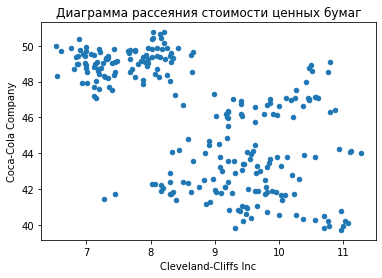

In [24]:
daily_close_pr.plot.scatter(x = lmin[0], y=lmin[1], 
                            title = "Диаграмма рассеяния стоимости ценных бумаг");